In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
G = nx.karate_club_graph()

In [3]:
def run_ic(G , seeds , p = 0.1 , simulations =100):
    total_spread = 0
    for _ in range(simulations):
        active = set(seeds)
        newly_active = set(seeds)
        while newly_active:
            next_active = set()
            for node in newly_active:
                for neighbor in G.neighbors(node):
                    if neighbor not in active and random.random() <p:
                        next_active.add(neighbor)
            newly_active = next_active
            active |= next_active
        total_spread += len(active)
    return total_spread / simulations
            

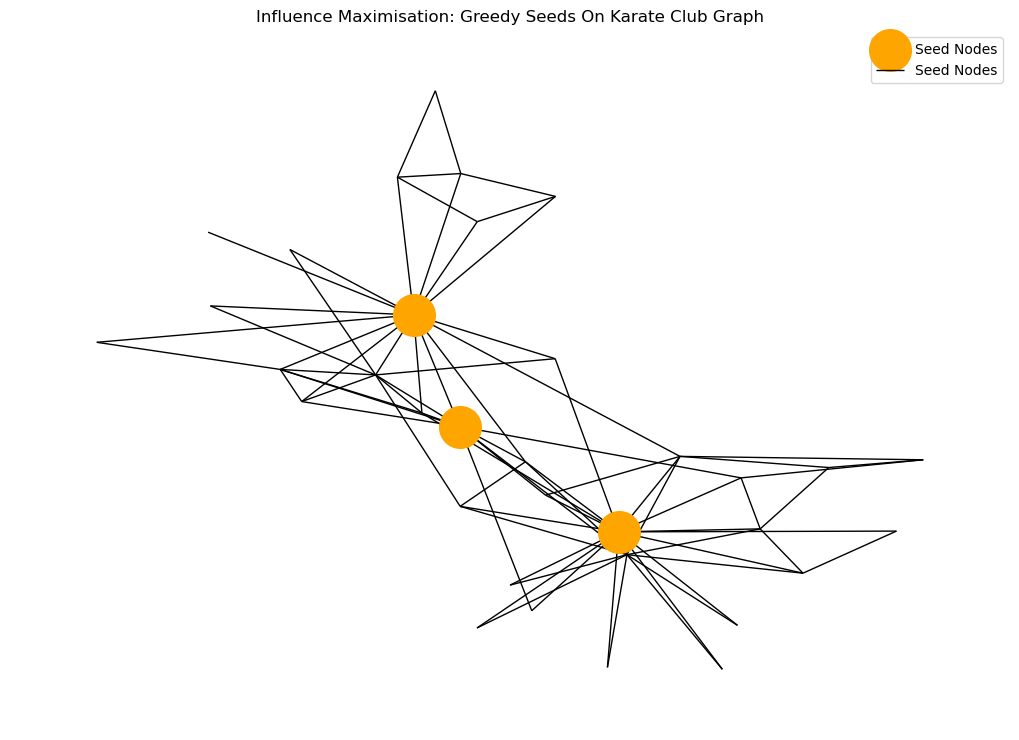

In [4]:
def greedy_influence_maximisation(G , k = 3 , p = 0.1 , simulations = 100):
    seeds = []
    for _ in range(k):
        best_node = None
        best_gain = -1
        for node in G.nodes():
            if node in seeds:
                continue
            gain = run_ic(G , seeds + [node],p,simulations) - run_ic(G , seeds , p ,simulations)
            if gain > best_gain:
                best_gain = gain
                best_node = node
        seeds.append(best_node)
    return seeds

seed_nodes = greedy_influence_maximisation(G , k=3,p=0.1,simulations=100)

pos = nx.spring_layout(G , seed = 42)
plt.figure(figsize=(10,7))
nx.draw(G , pos , nodelist=seed_nodes,node_color='orange',node_size=900,label='Seed Nodes')
plt.title("Influence Maximisation: Greedy Seeds On Karate Club Graph")
plt.legend()
plt.show()
